In [37]:
import pandas 
import sklearn 
from sklearn import svm 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
import seaborn as sb 
import matplotlib.pyplot as plt
from random import randint 
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data_frame_train = pandas.read_csv('all/train.csv')
data_frame_test = pandas.read_csv('all/test.csv')

### Initial Test 

In [3]:
rows, col = data_frame_train.shape
tr_rows = int(rows * .80)
val_rows = rows - tr_rows 
train_df = data_frame_train[:tr_rows]
val_df = data_frame_train[tr_rows+1:]
val_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


In [4]:
df_train_ground_truth = train_df['Survived']
df_val_ground_truth = val_df['Survived']

In [5]:
train_df=train_df.drop(['Survived'],axis=1)
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
val_df = val_df.drop(['Survived'],axis=1)
val_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
713,714,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
717,718,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


In [7]:
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0})
val_df['Sex'] = val_df['Sex'].map({'female':1, 'male':0})

In [8]:
train_df=train_df.drop(['Name'],axis=1)
train_df=train_df.drop(['Cabin'],axis=1)
train_df=train_df.drop(['Embarked'],axis=1)
val_df=val_df.drop(['Name'],axis=1)
val_df=val_df.drop(['Cabin'],axis=1)
val_df=val_df.drop(['Embarked'],axis=1)
val_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
713,714,3,0,29.0,0,0,7545,9.4833
714,715,2,0,52.0,0,0,250647,13.0000
715,716,3,0,19.0,0,0,348124,7.6500
716,717,1,1,38.0,0,0,PC 17757,227.5250
717,718,2,1,27.0,0,0,34218,10.5000


In [9]:
train_df=train_df.drop(['Ticket'],axis=1)
val_df=val_df.drop(['Ticket'],axis=1)


In [10]:
train_df.fillna(0, inplace=True)
val_df.fillna(0, inplace=True)

In [11]:
clf = svm.SVC()
clf.fit(train_df.values, df_train_ground_truth.values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = clf.predict(val_df.values)

In [13]:
mean_absolute_error(df_val_ground_truth.values, y_pred)

0.3539325842696629

### Check for missing data 

In [14]:
data_frame_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_train_copy = data_frame_train.copy()
df_train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


My first data cleaning will be to drop the name, ticket, and cabin. I will turn embarked, and sex into categorical data. The age has missing data. I will attempt to augment this data with ages that are within the standdard deviation of the average age. Tomorrow, I plan to turn male/female and the embarked data into catergorical data 

In [16]:
df_train_copy = df_train_copy.drop(['Name'], axis=1)
df_train_copy = df_train_copy.drop(['PassengerId'], axis=1)
df_train_copy = df_train_copy.drop(['Ticket'], axis=1)
df_train_copy = df_train_copy.drop(['Cabin'], axis=1)
df_train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
#setting the nan values in age to average age 
std = int(df_train_copy['Age'].std(skipna=True))
avg = int(df_train_copy['Age'].mean())
print(avg)
print(std)
df_train_copy['Age'].fillna(avg, inplace=True)

29
14


### Turning the categorical variables into dummy variables 
- will need to do this for embarked and sex 

In [18]:
sex = pandas.get_dummies(df_train_copy['Sex'], drop_first=True)
sex.head()
emb = pandas.get_dummies(df_train_copy['Embarked'], drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
df_train_copy = df_train_copy.drop(['Sex', 'Embarked'], axis=1)
df_train_copy1 = pandas.concat([df_train_copy, sex, emb], axis=1)
df_train_copy1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Logistic Regression 

In [20]:
X = df_train_copy1.iloc[:,1:].values
y = df_train_copy1.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = log_reg.predict(X_test)

In [23]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[87  8]
 [29 55]]


In [24]:
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

             precision    recall  f1-score   support

          0       0.75      0.92      0.82        95
          1       0.87      0.65      0.75        84

avg / total       0.81      0.79      0.79       179

0.793296089385


### SVM 

In [25]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[88  7]
 [53 31]]
             precision    recall  f1-score   support

          0       0.62      0.93      0.75        95
          1       0.82      0.37      0.51        84

avg / total       0.71      0.66      0.63       179

0.664804469274


### Navie Bayesian

In [27]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[85 10]
 [26 58]]
             precision    recall  f1-score   support

          0       0.77      0.89      0.83        95
          1       0.85      0.69      0.76        84

avg / total       0.81      0.80      0.80       179

0.798882681564


### KNN 

In [29]:
n = int(len(X_train)/2)
print(n)

356


In [30]:
acc_list=[]
for i in range(1,n+1):
    nbrs = neighbors.KNeighborsClassifier(i)
    nbrs.fit(X_train, y_train)
    y_pred = nbrs.predict(X_test)
    accurarcy = accuracy_score(y_test, y_pred)
    acc_list.append(accurarcy)

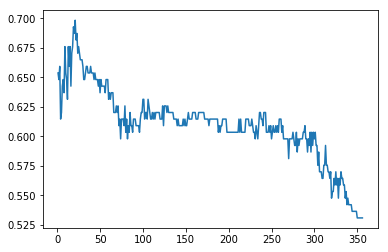

0.698324022346
20


In [36]:
axX = list(range(1, n+1))
ax = plt.axes()
ax.plot(axX, acc_list)
plt.show()
print(max(acc_list))
print(acc_list.index(max(acc_list)))

In [47]:
class dataTester:
    def __init__(self):
        self.model_dic = {"LogReg":LogisticRegression(), "NavBayes": GaussianNB(), "SVM":svm.SVC()}
        self.X_train = None
        self.y_train = None
        self.X_test = None 
        self.y_test = None
        self.n = None
    def KNN_max(self):
        rows = int(len(self.X_train)/2)
        acc_list=[]
        for i in range(1,n+1):
            nbrs = neighbors.KNeighborsClassifier(i)
            nbrs.fit(self.X_train, self.y_train)
            y_pred = nbrs.predict(self.X_test)
            accurarcy = accuracy_score(self.y_test, self.y_pred)
            acc_list.append(accurarcy)
        self.n = acc_list.index(max(acc_list))
    def testAcc(self, X, y):
        acc_dic = {}
        for i in self.model_dic: 
            print(i)
            #scores = cross_val_score(j, X, y, cv=5)
            #acc = scores.mean()
            #acc_dic[i] = acc
        return acc_dic
        
        
        

In [48]:
x = dataTester()
results = x.testAcc(X, y)

LogReg
NavBayes
SVM
